# Strategy for the optimal gain

Let's imaginge that we ordered 1000 sensors of dimension 36 × 24 mm $^{2}$.

We know that 50% of them work well and that their size tolerance is $\sigma_{1} = 0.05$ mm.

The other 50% are broken and their size tolerance  $\sigma_{2} = 0.25$ mm.

We have to come up with the strategy to distinguish between them only by checking their dimensions (we can't switch them on to check if they work).

How to find the optimal selection approach?

a. Let's find the corresponding ROC (Receiver-Operating-Characteristic) curve

b. Let's find the optimal selection cut (resulting in the highest financial gain), if we pay 10$ for each sensor, and we can sell good ones for 12$

We assume no correlation between the two dimensions, and we neglect measurement uncertainties.

# Contour of Q(h,w)

Q(h,w) is a likelihood ratio of two hypotheses: one that states that our sensor works and the other that it doesn't work with two variables: $h$ for height and $w$ for width. We can observe that the contour has a radially symmetric. 

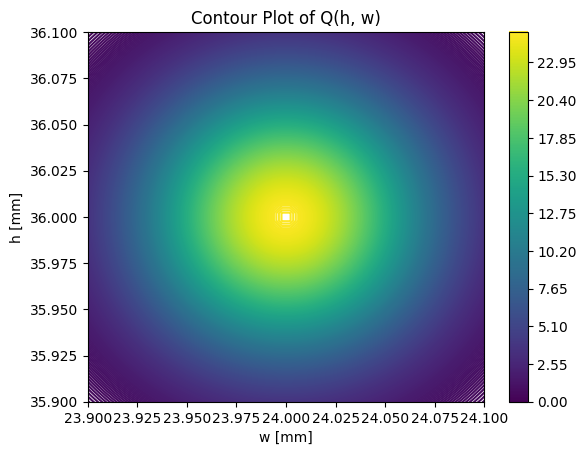

In [3]:
import numpy as np
import matplotlib.pyplot as plt

sigma_0 = 0.25
sigma_1 = 0.05
h_0 = 24
w_0 = 36

w = np.linspace(35, 37, 500)  
h = np.linspace(23, 25, 500)  
H, W = np.meshgrid(h, w)     

def Q(h, w, sigma_1, sigma_0, h_0, w_0):
    return sigma_0**2/sigma_1**2*np.exp((1/2)*(1/sigma_0**2 - 1/sigma_1**2)*((h-h_0)**2+(w-w_0)**2))

Q_HW = Q(H, W, sigma_1, sigma_0, h_0, w_0)

plt.figure()
contour = plt.contour(H, W, Q_HW, levels=500, cmap='viridis')
plt.colorbar(contour)
plt.title("Contour Plot of Q(h, w)")
plt.xlabel("w [mm]")
plt.ylabel("h [mm]")
plt.xlim(23.9,24.1)
plt.ylim(35.9,36.1)
plt.show()
plt.close()

# ROC curve

In [4]:
Q_cut = np.linspace(1e-15, 25, 1000)  
R2 = 2 * np.log((sigma_1**2/sigma_0**2)*Q_cut)/(1/sigma_0**2 - 1/sigma_1**2)
one_minus_alpha = np.exp(-R2/(2*sigma_0**2))
one_minus_beta = 1-np.exp(-R2/(2*sigma_1**2))

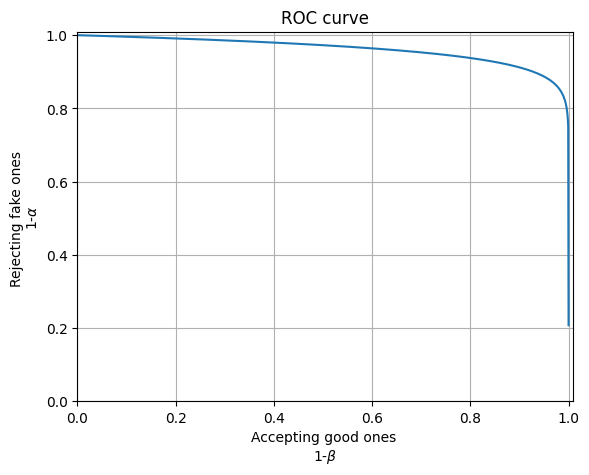

In [5]:
plt.figure()
plt.plot(one_minus_beta,one_minus_alpha)
plt.xlim(0,1.01)
plt.ylim(0,1.01)
plt.xlabel("Accepting good ones \n" + r"1-$\beta$")
plt.ylabel("Rejecting fake ones \n" + r"1-$\alpha$")
plt.title("ROC curve")
plt.grid()
plt.show()
plt.close()

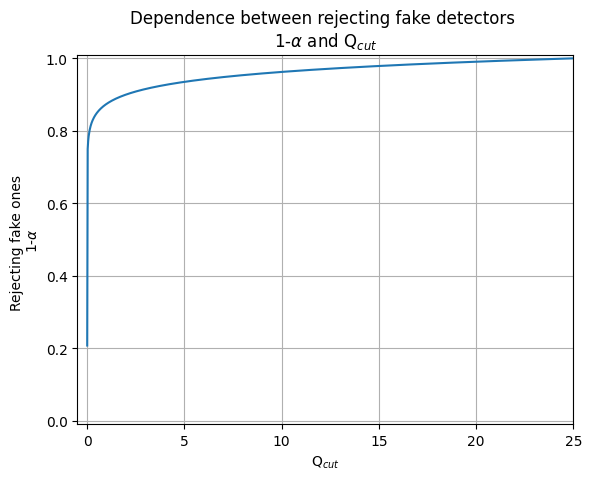

In [8]:
plt.figure()
plt.plot(Q_cut,one_minus_alpha)
plt.xlim(-0.5,25)
plt.ylim(-0.01,1.01)
plt.xlabel(r"Q$_{cut}$")
plt.ylabel("Rejecting fake ones \n" + r"1-$\alpha$")
plt.title("Dependence between rejecting fake detectors \n" + r"1-$\alpha$"+ r" and Q$_{cut}$")
plt.grid()
plt.show()
plt.close()

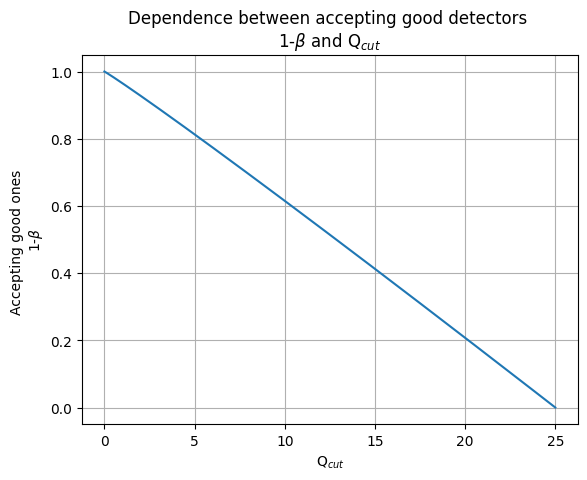

In [9]:
plt.figure()
plt.plot(Q_cut,one_minus_beta)
plt.xlabel(r"Q$_{cut}$")
plt.ylabel("Accepting good ones \n" + r"1-$\beta$")
plt.title("Dependence between accepting good detectors \n" + r"1-$\beta$"+ r" and Q$_{cut}$")
plt.grid()
plt.show()
plt.close()

# Optimal cut

The optimal cut can be calculated analytically. The functions below present the result of such derivations.

In [10]:
def a_cut(r_cut):
    return 1-np.exp(-r_cut**2/(2*sigma_0**2))

def b_cut(r_cut):
    return 1-np.exp(-r_cut**2/(2*sigma_1**2))

def gain(r_cut):
    return 2*500*b_cut(r_cut)-10*500*a_cut(r_cut)

r_cut_space = np.linspace(0.00001, 0.25, 100) 
Q_cut_space = sigma_0**2/sigma_1**2*np.exp((1/2)*(1/sigma_0**2 - 1/sigma_1**2)*r_cut_space**2)
gain_space = gain(r_cut_space)

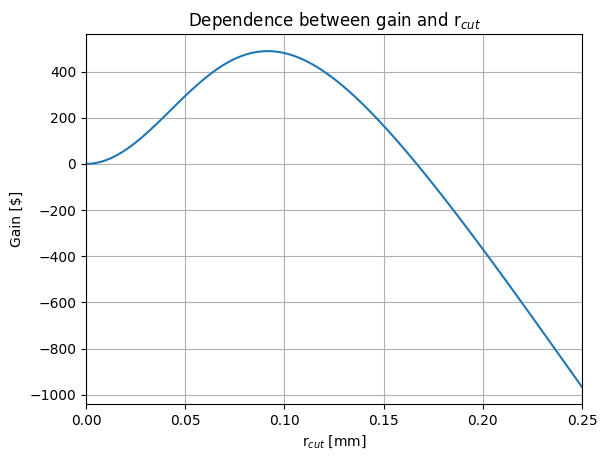

In [11]:
plt.figure()
plt.plot(r_cut_space,gain_space)
plt.xlabel(r"r$_{cut}$ [mm]")
plt.ylabel("Gain [$]")
plt.xlim(0,0.25)
plt.title(r"Dependence between gain and r$_{cut}$")
plt.grid()
plt.show()
plt.close()

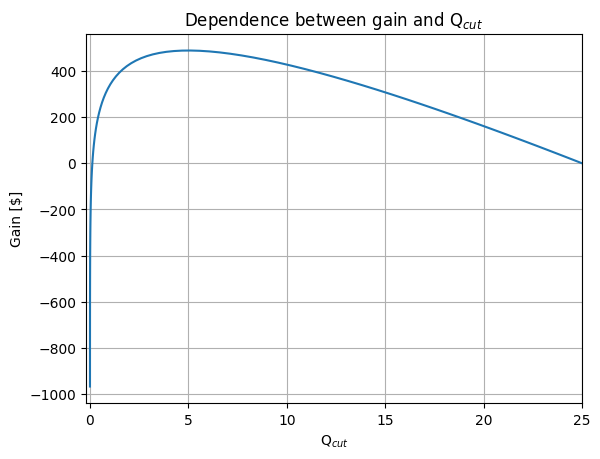

In [19]:
plt.figure()
plt.plot(Q_cut_space,gain_space)
plt.xlabel(r"Q$_{cut}$")
plt.ylabel("Gain [$]")
plt.title(r"Dependence between gain and Q$_{cut}$")
plt.xlim(-0.2,25)
plt.grid()
plt.show()
plt.close()

In [20]:
r_cut_optimal = np.sqrt((np.log(5*sigma_1**2/sigma_0**2))/(0.5*(1/sigma_0**2-1/sigma_1**2)))
print("The optimal value of r_cut is:","{:.4f}".format(r_cut_optimal), "mm")
# print(0.25*np.sqrt(np.log(5)/12))

The optimal value of r_cut is: 0.0916 mm


In [21]:
print("The maximal gain is:","{:.2f}".format(gain(r_cut_optimal)), "$")

The maximal gain is: 488.67 $


In [22]:
print("Corresponding probability of rejecting bad sensors 1-a_cut is:","{:.2f}".format(1-a_cut(r_cut_optimal)))
print("Corresponding probability of accepting good sensors b_cut is:","{:.2f}".format(b_cut(r_cut_optimal)))

Corresponding probability of rejecting bad sensors 1-a_cut is: 0.94
Corresponding probability of accepting good sensors b_cut is: 0.81


In [23]:
print("The optimal value of Q_cut is:", "{:.2f}".format(sigma_0**2/sigma_1**2*np.exp((1/2)*(1/sigma_0**2 - 1/sigma_1**2)*r_cut_optimal**2)))

The optimal value of Q_cut is: 5.00


# Simulation check

In [29]:
def mean_vector(v):
    return sum(v)/len(v)

def std_vector(v):
    N = len(v)
    m = mean_vector(v)
    std = sum((el - m)**2 for el in v)
    return np.sqrt(std/(N-1))

gain_checked_vector = []

for i in range(1000):
    h1 = np.random.normal(loc= 24, scale= 0.05, size = 500)
    w1 = np.random.normal(loc= 36, scale= 0.05, size = 500)

    h2 = np.random.normal(loc= 24, scale= 0.25, size = 500)
    w2 = np.random.normal(loc= 36, scale= 0.25, size = 500)

    delta_1 = np.sqrt((h1 - 24)**2 + (w1 - 36)**2)
    delta_2 = np.sqrt((h2 - 24)**2 + (w2 - 36)**2)

    accepcted_good_ones = 0
    accepcted_bad_ones = 0

    for j in range(len(delta_1)):
        if delta_1[j] <= r_cut_optimal:
            accepcted_good_ones += 1
        if delta_2[j] <= r_cut_optimal:
            accepcted_bad_ones += 1

    gain_checked = -10*accepcted_bad_ones + 2*accepcted_good_ones
    gain_checked_vector.append(gain_checked)


print("After running 1000 simulations, the mean value of the gain is:", "{:.2f}".format(mean_vector(gain_checked_vector)),"$")
print("with the standard deviation of: ","{:.2f}".format(std_vector(gain_checked_vector)), "$")
print("The result of the simulation (" + "{:.2f}".format(mean_vector(gain_checked_vector)) + " +/- " + "{:.2f}".format(std_vector(gain_checked_vector)) + ") $ is in line with the predicted optimal gain of " + "{:.2f}".format(gain(r_cut_optimal)) + " $")

After running 1000 simulations, the mean value of the gain is: 488.54 $
with the standard deviation of:  57.56 $
The result of the simulation (488.54 +/- 57.56) $ is in line with the predicted optimal gain of 488.67 $
